In [1]:
import pandas as pd
import sqlite3
from os import path
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
#bdPath = path.join("..", "BD", "bd.db")
bdPath = path.join("bd.db")

In [2]:
bd = sqlite3.connect(bdPath) 

jogadores = pd.read_sql('SELECT summonerId, nick, jogador.elo, eloNum, pdl, vitorias, derrotas, winrate FROM jogador INNER JOIN elo ON elo.elo = jogador.elo', bd)
jogadoresPartida = pd.read_sql('SELECT gameId, time, summonerId, campeaoNome, kdaPartida, danoPartida, wardsPartida, csPartida FROM jogador_partida', bd)
campeoesJogadores = pd.read_sql('SELECT campeaoId, campeaoNome, campeaoPref, summonerId, partidas, vitorias, derrotas, campeao_jogador.winrate, kda FROM campeao_jogador INNER JOIN campeao ON campeao.nome = campeao_jogador.campeaoNome', bd)
partidas = pd.read_sql('SELECT * FROM partida', bd)
campeoes = pd.read_sql('SELECT * FROM campeao', bd)
elos = pd.read_sql('SELECT * FROM elo', bd)

bd.close()

In [3]:
jogadores.head(5)

,summonerId,nick,elo,eloNum,pdl,vitorias,derrotas,winrate
0,400150,Mxu,Diamond 4,17,0,151,135,53.0
1,400152,Jackie,Diamond 2,19,51,125,99,56.0
2,400158,Cico,Platinum 2,15,17,210,217,49.0
3,400163,Lopesxz,Diamond 4,17,72,200,182,52.0
4,400165,VoIpe,Diamond 4,17,0,111,85,57.0


In [4]:
jogadoresPartida.head(5)

,gameId,time,summonerId,campeaoNome,kdaPartida,danoPartida,wardsPartida,csPartida
0,1565246983,0,9881323,Jarvan IV,1.56,14687,25,142
1,1565246983,0,-1,Shen,1.11,12216,12,168
2,1565246983,0,472988,Syndra,4.50,27190,11,213
3,1565246983,0,4981071,Lucian,4.60,39919,11,198
4,1565246983,0,419053,Janna,7.67,8802,30,8


In [5]:
campeoesJogadores.head(5)

,campeaoId,campeaoNome,campeaoPref,summonerId,partidas,vitorias,derrotas,winrate,kda
0,81,Ezreal,1,400152,7,3,4,0,1.81
1,79,Gragas,2,400152,3,2,1,100,6.43
2,518,Neeko,3,400152,3,2,1,67,2.07
3,39,Irelia,4,400152,3,1,2,67,1.45
4,412,Thresh,5,400152,2,2,0,33,4.53


In [6]:
partidas.head(5)

,gameId,vitoria,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t2_baronKills,t1_baronKills,...,t2_riftHeraldKills,t1_riftHeraldKills,t2_towerKills,t1_towerKills,t2_inhibitorKills,t1_inhibitorKills,killsRed,killsBlue,goldRed,goldBlue
0,1543534722,1,1,1,1,1,0,1,2,0,...,1,0,11,7,3,0,31,32,69192,64231
1,1543560305,0,1,1,0,0,0,0,0,2,...,0,1,4,10,0,2,31,30,67599,73322
2,1543561329,1,1,1,1,-1,1,1,0,0,...,1,0,11,2,2,0,32,17,45861,34047
3,1543562647,0,0,1,0,0,0,0,0,1,...,0,1,3,9,0,2,24,27,53165,59687
4,1543573986,1,1,1,-1,1,1,1,1,0,...,1,0,6,1,0,0,21,12,46575,36360


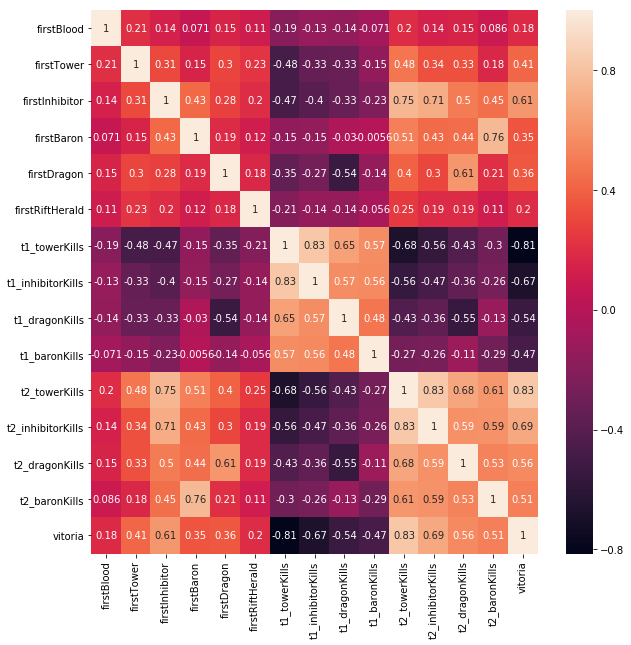

In [7]:
#Correlações dos dados de dentro da partida
fig = plt.figure(figsize=(10,10))
sns.heatmap(partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_dragonKills', 't1_baronKills', 
                  't2_towerKills', 't2_inhibitorKills', 't2_dragonKills', 't2_baronKills', 'vitoria']].corr(), annot=True)

In [8]:
#Testando a partir de marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85      6534
          1       0.85      0.84      0.85      6260

avg / total       0.85      0.85      0.85     12794



In [9]:
#Testando a partir de poucos marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstTower']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.71      0.73      0.72      6563
          1       0.71      0.69      0.70      6231

avg / total       0.71      0.71      0.71     12794



In [10]:
#Testando a partir de objetivos destruidos (qtd de Torres e Inibidores)
x = partidas[['t1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      6538
          1       0.96      0.97      0.96      6256

avg / total       0.96      0.96      0.96     12794



In [11]:
bd = sqlite3.connect(bdPath) 

jogadoresPartida2 = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao.campeaoId, kdaPartida, danoPartida, wardsPartida, csPartida, partida.vitoria FROM jogador_partida INNER JOIN partida ON jogador_partida.gameId = partida.gameId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome', bd)

bd.close()

In [12]:
jogadoresPartida2.head(10)

,gameId,time,summonerId,campeaoNome,campeaoId,kdaPartida,danoPartida,wardsPartida,csPartida,vitoria
0,1543561329,1,-1,Zyra,143,17.00,11660,10,24,1
1,1543573986,1,11500133,Zyra,143,4.50,13637,18,28,1
2,1543611352,0,479335,Zyra,143,2.75,12319,22,49,0
3,1543624002,0,484985,Zyra,143,2.40,13527,10,27,0
4,1543626176,0,479335,Zyra,143,3.60,18758,29,26,0
5,1543632355,1,-1,Zyra,143,2.33,13633,22,44,0
6,1543679228,0,-1,Zyra,143,4.67,16397,13,43,1
7,1543753673,0,-1,Zyra,143,1.88,21678,41,62,1
8,1543769671,0,492034,Zyra,143,2.00,23228,24,63,1
9,1543771574,0,1833315,Zyra,143,4.00,20162,38,47,1


In [13]:
#Testando com base no desempenho individual do jogador naquela partida
x = jogadoresPartida2[['summonerId', 'time', 'campeaoId', 'kdaPartida', 'danoPartida', 'wardsPartida', 'csPartida']]
y = jogadoresPartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.51      1.00      0.68     73069
          1       0.00      0.00      0.00     70341

avg / total       0.26      0.51      0.34    143410



In [14]:
bd = sqlite3.connect(bdPath)
prePartida = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, partida.vitoria, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao_jogador.campeaoPref, campeao_jogador.partidas, campeao_jogador.vitorias, campeao_jogador.derrotas, campeao_jogador.winrate, campeao_jogador.kda  FROM jogador_partida INNER JOIN campeao_jogador ON jogador_partida.summonerId = campeao_jogador.summonerId AND jogador_partida.campeaoNome = campeao_jogador.campeaoNome INNER JOIN partida ON jogador_partida.gameId = partida.gameId', bd)
bd.close()

In [15]:
prePartida.head(10)

,gameId,time,vitoria,summonerId,campeaoNome,campeaoPref,partidas,vitorias,derrotas,winrate,kda
0,1563587014,0,0,16701144,Karthus,1,72,40,32,56,2.34
1,1563587014,0,0,2242453,Lucian,2,41,21,20,51,2.59
2,1563587014,0,0,23250247,Darius,3,27,14,13,52,1.49
3,1563587014,1,0,663580,Ezreal,1,40,20,20,50,3.09
4,1563587014,1,0,2834636,Malphite,2,10,7,3,70,2.39
5,1563559582,0,1,2795780,Gangplank,1,71,39,32,55,2.45
6,1563559582,1,1,14411474,Kha'Zix,7,8,6,2,75,4.26
7,1563559582,1,1,4461435,Lissandra,1,60,38,22,63,2.71
8,1563559582,1,1,2242453,Kai'Sa,1,42,25,17,60,3.26
9,1563523256,0,1,494257,Vayne,7,9,4,5,44,2.15


In [16]:
#Testando apenas com dados pre-partida / historico com o campeao (Individual)
x = prePartida[['time', 'summonerId', 'campeaoPref', 'partidas', 'winrate', 'kda']]
y = prePartida['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.51      1.00      0.67     35105
          1       0.00      0.00      0.00     34206

avg / total       0.26      0.51      0.34     69311



In [17]:
bd = sqlite3.connect(bdPath)
prePartida2 = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, partida.vitoria, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao.campeaoId, campeao_jogador.campeaoPref, campeao_jogador.partidas, campeao_jogador.vitorias, campeao_jogador.derrotas, campeao_jogador.winrate, campeao_jogador.kda, jogador.nick, jogador.elo, elo.eloNum, jogador.winrate as winrateJog  FROM jogador_partida INNER JOIN campeao_jogador ON jogador_partida.summonerId = campeao_jogador.summonerId AND jogador_partida.campeaoNome = campeao_jogador.campeaoNome INNER JOIN partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN elo ON jogador.elo = elo.elo INNER JOIN campeao ON campeao.nome = campeao_jogador.campeaoNome', bd)
bd.close()

prePartida2.head(10)

,gameId,time,vitoria,summonerId,campeaoNome,campeaoId,campeaoPref,partidas,vitorias,derrotas,winrate,kda,nick,elo,eloNum,winrateJog
0,1563587014,0,0,16701144,Karthus,30,1,72,40,32,56,2.34,PGD HiagoD,Diamond 4,17,51.0
1,1563587014,0,0,2242453,Lucian,236,2,41,21,20,51,2.59,Rock fella,Diamond 4,17,50.0
2,1563587014,0,0,23250247,Darius,122,3,27,14,13,52,1.49,Divine Zama,Diamond 3,18,49.0
3,1563587014,1,0,663580,Ezreal,81,1,40,20,20,50,3.09,Salsixa,Diamond 4,17,50.0
4,1563587014,1,0,2834636,Malphite,54,2,10,7,3,70,2.39,uK AnarchMonkey,Diamond 4,17,56.0
5,1563559582,0,1,2795780,Gangplank,41,1,71,39,32,55,2.45,O Monstro,Diamond 4,17,50.0
6,1563559582,1,1,14411474,Kha'Zix,121,7,8,6,2,75,4.26,SugiroQueFlash,Diamond 4,17,51.0
7,1563559582,1,1,4461435,Lissandra,127,1,60,38,22,63,2.71,Fala que me Ama,Diamond 4,17,52.0
8,1563559582,1,1,2242453,Kai'Sa,145,1,42,25,17,60,3.26,Rock fella,Diamond 4,17,50.0
9,1563523256,0,1,494257,Vayne,67,7,9,4,5,44,2.15,Luke Waki,Diamond 4,17,50.0


In [18]:
#Testando apenas com dados pre-partida / historico com o campeao + historico do jogador (Individual)
x = prePartida2[['time', 'summonerId', 'campeaoId', 'campeaoPref', 'partidas', 'winrate', 'kda', 'eloNum', 'winrateJog']]
y = prePartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.51      1.00      0.67     28177
          1       0.00      0.00      0.00     27272

avg / total       0.26      0.51      0.34     55449



In [19]:
bd = sqlite3.connect(bdPath)
prePartidaTotal = pd.read_sql('SELECT partida.gameId, partida.vitoria, jogador_partida.time, jogador_partida.summonerId, jogador.winrate, jogador.vitorias, jogador.derrotas, campeao.campeaoId, elo.eloNum, jogador.pdl, campeao_jogador.campeaoPref, campeao_jogador.partidas as partidasCamp, campeao_jogador.winrate as winrateCamp, campeao_jogador.vitorias as vitoriasCamp, campeao_jogador.derrotas as derrotasCamp, campeao_jogador.kda as kdaCamp FROM partida INNER JOIN jogador_partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome INNER JOIN elo ON elo.elo = jogador.elo INNER JOIN campeao_jogador ON campeao_jogador.summonerId = jogador_partida.summonerId AND campeao_jogador.campeaoNome = jogador_partida.campeaoNome', bd)
#prePartidaTotal.to_sql("prePartida", bd, if_exists="replace")
bd.close()

In [20]:
prePartidaTotal = prePartidaTotal.sort_values(['gameId', 'time'])
prePartidaTotal.head(5)

,gameId,vitoria,time,summonerId,winrate,vitorias,derrotas,campeaoId,eloNum,pdl,campeaoPref,partidasCamp,winrateCamp,vitoriasCamp,derrotasCamp,kdaCamp
3548,1543534722,1,0,662858,53.0,216,192,115,17,23,7,0,33,0,0,2.14
22677,1543534722,1,0,1392728,49.0,261,270,4,17,59,1,49,51,25,24,3.77
53590,1543534722,1,0,1910408,50.0,476,481,267,17,46,1,190,55,105,85,3.16
84175,1543534722,1,1,3840146,55.0,104,85,30,18,0,7,12,67,8,4,1.93
85547,1543534722,1,1,410739,56.0,93,74,43,17,18,7,0,100,0,0,2.50


In [21]:
#Valores agrupados por time
bd = sqlite3.connect(bdPath)
prePartidaPorTime = pd.read_sql('SELECT partida.gameId, partida.vitoria, jogador_partida.time,  SUM(jogador.winrate) AS winrateJogadores, SUM(jogador.vitorias) AS vitoriasJogadores, SUM(jogador.derrotas) AS derrotasJogadores, SUM(elo.eloNum) AS elosJogadores, SUM(jogador.pdl) AS pdlJogadores, SUM(campeao_jogador.campeaoPref) AS prefJogadores, SUM(campeao_jogador.partidas) as partidasCamp, SUM(campeao_jogador.winrate) as winrateCamp, SUM(campeao_jogador.vitorias) as vitoriasCamp, SUM(campeao_jogador.derrotas) as derrotasCamp, SUM(campeao_jogador.kda) as kdaCamp FROM partida INNER JOIN jogador_partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome INNER JOIN elo ON elo.elo = jogador.elo INNER JOIN campeao_jogador ON campeao_jogador.summonerId = jogador_partida.summonerId AND campeao_jogador.campeaoNome = jogador_partida.campeaoNome GROUP BY jogador_partida.gameId, jogador_partida.time', bd)
bd.close()

prePartidaPorTime.head(5)

,gameId,vitoria,time,winrateJogadores,vitoriasJogadores,derrotasJogadores,elosJogadores,pdlJogadores,prefJogadores,partidasCamp,winrateCamp,vitoriasCamp,derrotasCamp,kdaCamp
0,1543534722,1,0,152.0,953,943,51,128,9,239,139,130,109,9.07
1,1543534722,1,1,162.0,685,619,52,75,15,69,223,40,29,8.07
2,1543560305,0,0,257.0,3055,2974,98,248,8,453,289,257,196,15.19
3,1543560305,0,1,152.0,1914,1897,56,196,10,81,188,55,26,8.51
4,1543561329,1,0,100.0,990,989,34,32,6,64,113,38,26,4.61


In [22]:
#Testando apenas com dados somados de times separadamente
x = prePartidaPorTime[['time', 'winrateJogadores', 'vitoriasJogadores', 'derrotasJogadores', 'elosJogadores', 'pdlJogadores', 'prefJogadores', 'partidasCamp', 'winrateCamp', 'vitoriasCamp', 'derrotasCamp', 'kdaCamp']]
y = prePartidaPorTime['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.53      0.76      0.62      9620
          1       0.53      0.29      0.37      9194

avg / total       0.53      0.53      0.50     18814



In [23]:
is_par = prePartidaPorTime.index.astype(int) % 2 == 0
pares  = prePartidaPorTime[is_par]
impares  = prePartidaPorTime[~is_par]

#prePartidaPorTime2 = pares.join(impares, on='gameId', lsuffix='_caller', rsuffix='_other')
#prePartidaPorTime2.drop_duplicates(subset ="gameId", keep = 'first', inplace = True) 
#prePartidaPorTime2.set_index('gameId').join(prePartidaPorTime2.set_index('gameId'))

prePartidaPorTime2 = pd.merge(pares,impares,on='gameId')
prePartidaPorTime2.head(5)

,gameId,vitoria_x,time_x,winrateJogadores_x,vitoriasJogadores_x,derrotasJogadores_x,elosJogadores_x,pdlJogadores_x,prefJogadores_x,partidasCamp_x,...,vitoriasJogadores_y,derrotasJogadores_y,elosJogadores_y,pdlJogadores_y,prefJogadores_y,partidasCamp_y,winrateCamp_y,vitoriasCamp_y,derrotasCamp_y,kdaCamp_y
0,1543534722,1,0,152.0,953,943,51,128,9,239,...,685,619,52,75,15,69,223,40,29,8.07
1,1543560305,0,0,257.0,3055,2974,98,248,8,453,...,1914,1897,56,196,10,81,188,55,26,8.51
2,1543561329,1,0,100.0,990,989,34,32,6,64,...,396,371,17,18,1,16,56,9,7,3.03
3,1543562647,0,0,106.0,354,304,35,100,2,56,...,574,534,52,171,14,43,147,21,22,10.00
4,1543573986,1,0,55.0,215,173,18,0,1,39,...,1279,1238,52,185,5,151,194,102,49,9.13


In [24]:
prePartidaPorTime2.columns

Index(['gameId', 'vitoria_x', 'time_x', 'winrateJogadores_x',
       'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x',
       'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x',
       'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'vitoria_y', 'time_y',
       'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y',
       'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y',
       'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y',
       'kdaCamp_y'],
      dtype='object')

In [25]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.51      0.87      0.64      5520
          1       0.52      0.15      0.23      5419

avg / total       0.51      0.51      0.44     10939



In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

#Testando partida com os dados somados dos jogadores com MLP
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

             precision    recall  f1-score   support

          0       0.52      0.79      0.62      5641
          1       0.48      0.21      0.29      5298

avg / total       0.50      0.51      0.46     10939



In [27]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

             precision    recall  f1-score   support

          0       0.57      0.02      0.04      5641
          1       0.49      0.99      0.65      5298

avg / total       0.53      0.49      0.33     10939



In [28]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateCamp_x', 'prefJogadores_x', 'winrateCamp_y', 'prefJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

             precision    recall  f1-score   support

          0       0.52      0.99      0.68      5641
          1       0.52      0.01      0.02      5298

avg / total       0.52      0.52      0.36     10939



In [29]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y', 'elosJogadores_x', 'elosJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5641
          1       0.48      1.00      0.65      5298

avg / total       0.23      0.48      0.32     10939



In [30]:
#Mesmo teste acima mas com Naive Bayes
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
total = X.shape[0]
erros = (y != y_pred).sum()
print("Precisão: ", erros/total)

Precisão:  0.48610476277539083


In [31]:
#Mesmo teste acima mas com KNN
import numpy
from sklearn.neighbors import KNeighborsClassifier

X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
yt = y_test
xt = X_test
knn.fit(xt,yt)

#validacão com o restante dos dados
xv = X_train
yv = y_train
yp = knn.predict(xv)

knn.score(xv, yv)

0.5058963342170216